In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Set Up Neural Net Class (Same Code as 'Neural Network.ipynb')

In [3]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.learning_rate = 0.1
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        #Weights connecting inputs -> hidden layer
        self.weights_ih = np.random.uniform(low=-1, high=1, size=(hidden_nodes,input_nodes))
        #Weights connecting hidden layer -> output layer
        self.weights_ho = np.random.uniform(low=-1, high=1, size=(output_nodes, hidden_nodes))
        
        #Init Weights as random valued vectors of height = to number of nodes
        self.bias_ih = np.random.uniform(low=-1, high=1, size=[hidden_nodes, 1])
        self.bias_ho = np.random.uniform(low=-1, high=1, size=[output_nodes, 1])

    def feed_forward(self, inputs):
        #Reshape inputs to have the apropriate (n x 1) shape (column vector)
        reshaped = np.array(inputs).reshape(self.input_nodes, 1)
        
        #Apply H = Sigmoid(W*I + B)
        hidden = np.matmul(self.weights_ih, reshaped)
        hidden = hidden + self.bias_ih
        hidden = sigmoid(hidden)    

        #Apply O = Sigmoid(W*H + B)
        output = np.matmul(self.weights_ho, hidden)
        output = output + self.bias_ho
        output = sigmoid(output)
        
        #Return O
        return output
    
    def train(self, inputs, targets):
        
        ###
        ### Apply Feed Forward Algorithm to Get Outputs and Hidden layer sigmoided
        ###
        
        reshaped = np.array(inputs).reshape(self.input_nodes, 1)
        
        #Apply H = Sigmoid(W*I + B)
        hidden = np.matmul(self.weights_ih, reshaped)
        hidden = hidden + self.bias_ih
        hidden = sigmoid(hidden)    

        #Apply O = Sigmoid(W*H + B)
        output = np.matmul(self.weights_ho, hidden)
        output = output + self.bias_ho
        output = sigmoid(output)
                
        ###
        ### Apply Gradient Descent Algorithm
        ###
        
        #Reshape targets to convert from list to n x 1 array
        targets = np.array(targets).reshape(self.output_nodes, 1)
        #Calculate output errors as difference between point label and NN output
        output_errors = targets - output
        
        #Calculate gradient of output processed by sigmoid as (sigmoid * 1-sigmoid)
        gradient = output * (1 - output)
        #Calculate W_ho = lr * gradient * E_o x H^t
        delta_weight_ho = self.learning_rate * gradient * output_errors
        #Calculate new biases before multiplying by transposed hidden layer from deltas
        self.bias_ho += delta_weight_ho
        #Calculate new weights from deltas
        delta_weight_ho = np.matmul(delta_weight_ho, np.transpose(hidden))
        #Use calculated deltas to adjust hidden to output error deltas
        self.weights_ho += delta_weight_ho
        
        #Calculate hidden_errors by W_ho^t * output_errors 
        hidden_errors = np.matmul(np.transpose(self.weights_ho), output_errors)
        #Apply gradient to sigmoid transformation of hidden layer as above
        hidden_gradient = hidden * (1 - hidden)
        #Calculate deltas for bias adjustments
        delta_weight_ih = self.learning_rate * hidden_gradient * hidden_errors
        self.bias_ih += delta_weight_ih
        #Finalize deltas for weights adjustment.
        delta_weight_ih = np.matmul(delta_weight_ih, np.transpose(reshaped))
        #Update input -> hidden layer weights with calculated deltas
        self.weights_ih += delta_weight_ih

        

In [4]:
data = pd.read_csv('./mnist_train.csv', header=None)

### Separate Data By Label and Value

In [5]:
values = np.array(data)

##### Initialize Neural Net With 794 (28x28) Grayscale Values as Inputs, 100 Node Hidden Layer, and 10 Outputs [prediction confidence of 0-9]

In [6]:
brain = NeuralNetwork(784, 100, 10)

### Train Neural Net

In [7]:
for row in values:
    label = [1 if row[0]==x else 0 for x in range(10)]
    # ex: label should be [0 0 0 1 0 0 0 0 0 0] for a value of 3
    # Train data on grayscale values normalized between 0 and 1. (divide each value by 255). Train on corresponding matrix label generated above
    brain.train(row[1:] / 255, label)


##### Calculate Training Data Prediction Accuracy

In [8]:
def nnout(row):
    # Returns whether prediction made by trained NN matches the training data at a given row (input). Normalize each value as above.
    guess = brain.feed_forward(values[row, 1:] / 255)
    # Returns boolean whether prediction is equal to value in labels
    return np.argmax(guess) == values[row, 0]

In [9]:
print('Training Data Accuracy: ', sum([nnout(x) for x in range(len(values))])/len(values))

Training Data Accuracy:  0.9466833333333333


### Load testing data

In [10]:
test = np.array(pd.read_csv('./mnist_test.csv', header=None))

##### Calculate training data accuracy

In [11]:
guesses = []
for row in test:
    guess = brain.feed_forward(row[1:]/255)
    guesses.append(np.argmax(guess) == row[0])
    
print('Test Data Accuracy: ', sum(guesses)/len(test))

Test Data Accuracy:  0.9441


##### Draw a number on http://www.ccom.ucsd.edu/~cdeotte/programs/MNIST.html and download to test

Prediction:  7


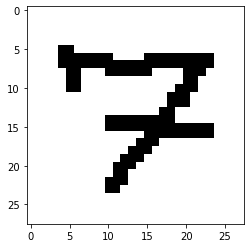

In [12]:
nine = np.array(pd.read_csv('./testData.csv'))
nine.resize(28,28)
plt.imshow(nine, cmap='Greys')
nine = np.array(pd.read_csv('./testData.csv'))
print('Prediction: ', np.argmax(brain.feed_forward(nine/255)))

In [13]:
kaggle = pd.read_csv('train.csv')
arkaggle = np.array(kaggle)

In [14]:
kbrain = NeuralNetwork(784, 100, 10)

In [15]:
for row in arkaggle:
    label = [1 if row[0]==x else 0 for x in range(10)]
    # ex: label should be [0 0 0 1 0 0 0 0 0 0] for a value of 3
    # Train data on grayscale values normalized between 0 and 1. (divide each value by 255). Train on corresponding matrix label generated above
    kbrain.train(row[1:] / 255, label)

In [16]:
def nnout(row):
    # Returns whether prediction made by trained NN matches the training data at a given row (input). Normalize each value as above.
    guess = kbrain.feed_forward(arkaggle[row, 1:] / 255)
    # Returns boolean whether prediction is equal to value in labels
    return np.argmax(guess) == arkaggle[row, 0]

In [17]:
print('Training Data Accuracy: ', sum([nnout(x) for x in range(len(arkaggle))])/len(arkaggle))

Training Data Accuracy:  0.9533095238095238


In [24]:
kaggle_test = pd.read_csv('test.csv')
kaggle_test = np.array(kaggle_test)

In [69]:
guesses = []
for row in kaggle_test:
    guess = kbrain.feed_forward(row/255)
    guesses.append(np.argmax(guess))

#print(guesses)
a = np.array(range(1, len(guesses)+1))
guesses = np.array([a, guesses])
#guesses = guesses.transpose()

In [80]:
kaggle_out = pd.DataFrame(guesses)
kaggle_out = kaggle_out.transpose()
kaggle_out.to_csv('out.csv', index=False)